# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key
temp_units = "imperial"
# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

# Output CSV
output_data_file = "Output/weather_df.csv"

# define url
query_url = f"http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units={temp_units}&q="


### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []
# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
# If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")


Number of cities in the list: 613


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# set lists for the dataframe
city_two = []
cloudinesses = []
dates = []
humidities = []
lats = []
lngs = []
max_temps = []
wind_speeds = []
countries = []

# set initial count quantities for organization
count_one = 0
set_one = 1

# loops for creating dataframe columns
for city in cities:
    try:
        response = requests.get(query_url + city.replace(" ","&")).json()
        cloudinesses.append(response['clouds']['all'])
        countries.append(response['sys']['country'])
        dates.append(response['dt'])
        humidities.append(response['main']['humidity'])
        lats.append(response['coord']['lat'])
        lngs.append(response['coord']['lon'])
        max_temps.append(response['main']['temp_max'])
        wind_speeds.append(response['wind']['speed'])
        if count_one > 48:
            count_one = 1
            set_one += 1
            city_two.append(city)
        else:
            count_one += 1
            city_two.append(city)
        print(f"Processing Record {count_one} of Set {set_one} | {city}")
    except Exception:
        print("City not found. Skipping...")

# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | atuona
Processing Record 2 of Set 1 | rikitea
Processing Record 3 of Set 1 | mount gambier
Processing Record 4 of Set 1 | ponta do sol
City not found. Skipping...
Processing Record 5 of Set 1 | bambous virieux
Processing Record 6 of Set 1 | ushuaia
Processing Record 7 of Set 1 | cherskiy
Processing Record 8 of Set 1 | sinnamary
City not found. Skipping...
Processing Record 9 of Set 1 | boende
Processing Record 10 of Set 1 | puerto ayora
City not found. Skipping...
Processing Record 11 of Set 1 | tandalti
Processing Record 12 of Set 1 | sitka
Processing Record 13 of Set 1 | lebu
Processing Record 14 of Set 1 | hasaki
Processing Record 15 of Set 1 | busselton
Processing Record 16 of Set 1 | terrace
Processing Record 17 of Set 1 | mataura
Processing Record 18 of Set 1 | ancud
City not found. Skipping...
Processing Record 19 of Set 1 | qaanaaq
Processing Record 20 of Set 1 | vaini
Processing Record 21 of Set 1 | punta arenas
Processing Record 22 of Set 1 | ni

Processing Record 35 of Set 4 | khor
Processing Record 36 of Set 4 | pevek
Processing Record 37 of Set 4 | hyeres
Processing Record 38 of Set 4 | mar del plata
Processing Record 39 of Set 4 | denpasar
Processing Record 40 of Set 4 | wladyslawowo
City not found. Skipping...
Processing Record 41 of Set 4 | asau
Processing Record 42 of Set 4 | vostok
Processing Record 43 of Set 4 | san patricio
Processing Record 44 of Set 4 | severo-kurilsk
Processing Record 45 of Set 4 | carnarvon
Processing Record 46 of Set 4 | torbay
City not found. Skipping...
Processing Record 47 of Set 4 | lipari
City not found. Skipping...
Processing Record 48 of Set 4 | tadine
Processing Record 49 of Set 4 | catamarca
Processing Record 1 of Set 5 | nouakchott
Processing Record 2 of Set 5 | arman
Processing Record 3 of Set 5 | razole
Processing Record 4 of Set 5 | bandarbeyla
Processing Record 5 of Set 5 | sterling
Processing Record 6 of Set 5 | yara
Processing Record 7 of Set 5 | canmore
Processing Record 8 of Set

Processing Record 25 of Set 8 | coihueco
Processing Record 26 of Set 8 | dabola
Processing Record 27 of Set 8 | port lincoln
Processing Record 28 of Set 8 | ulcinj
Processing Record 29 of Set 8 | stanovoye
Processing Record 30 of Set 8 | labuhan
Processing Record 31 of Set 8 | mount pleasant
Processing Record 32 of Set 8 | belaya gora
Processing Record 33 of Set 8 | new braunfels
Processing Record 34 of Set 8 | itarema
Processing Record 35 of Set 8 | sorata
Processing Record 36 of Set 8 | piraquara
Processing Record 37 of Set 8 | arlit
Processing Record 38 of Set 8 | juneau
Processing Record 39 of Set 8 | agadez
Processing Record 40 of Set 8 | osoyoos
Processing Record 41 of Set 8 | lamar
Processing Record 42 of Set 8 | erdenet
Processing Record 43 of Set 8 | beyneu
Processing Record 44 of Set 8 | kawalu
Processing Record 45 of Set 8 | bani
Processing Record 46 of Set 8 | pathein
Processing Record 47 of Set 8 | leh
Processing Record 48 of Set 8 | tuma
Processing Record 49 of Set 8 | ma

In [4]:
# create a dictionary for establishing dataframe
weather_dict = {
    "City":city_two,
    "Cloudiness":cloudinesses,
    "Country":countries,
    "Date":dates,
    "Humidity":humidities,
    "Lat":lats,
    "Lng":lngs,
    "Max Temp":max_temps,
    "Wind Speed":wind_speeds
}


    
# establish dataframe
city_data_df  = pd.DataFrame(weather_dict)
# show the top of the dataframe
city_data_df .head()


,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,atuona,37,PF,1670384631,81,-9.8000,-139.0333,76.78,14.97
1,rikitea,9,PF,1670384633,81,-23.1203,-134.9692,75.43,20.47
2,mount gambier,19,GB,1670384657,86,53.6597,-1.8537,33.96,3.38
3,ponta do sol,98,PT,1670384654,73,38.7333,-28.2667,51.66,34.40
4,bambous virieux,43,MU,1670384713,75,-20.2567,57.4061,79.14,13.82


In [5]:
# Export the City_Data into a csv
city_data_df .to_csv("../output_data/cities.csv", index_label="City_ID")
city_data_df  = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df .head()


,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
City_ID,,,,,,,,,
0,atuona,37,PF,1670384631,81,-9.8000,-139.0333,76.78,14.97
1,rikitea,9,PF,1670384633,81,-23.1203,-134.9692,75.43,20.47
2,mount gambier,19,GB,1670384657,86,53.6597,-1.8537,33.96,3.38
3,ponta do sol,98,PT,1670384654,73,38.7333,-28.2667,51.66,34.40
4,bambous virieux,43,MU,1670384713,75,-20.2567,57.4061,79.14,13.82


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

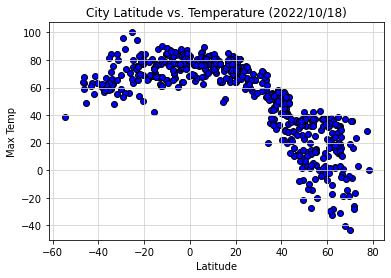

In [7]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df ["Lat"],city_data_df ["Max Temp"],edgecolors="black",facecolors="blue")
plt.title("City Latitude vs. Temperature (2022/10/18)")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

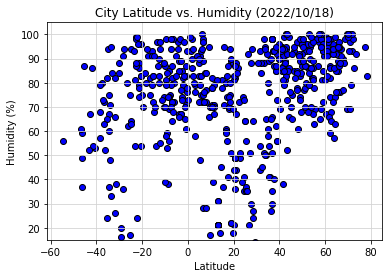

In [8]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df ["Lat"],city_data_df ["Humidity"],edgecolors="black",facecolors="blue")
plt.title("City Latitude vs. Humidity (2022/10/18)")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.ylim(15,105)
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

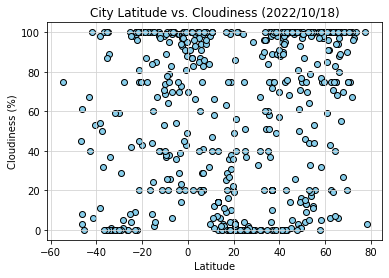

In [9]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df ["Lat"],city_data_df ["Cloudiness"],edgecolors="black",facecolors="skyblue")
plt.title("City Latitude vs. Cloudiness (2022/10/18)")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

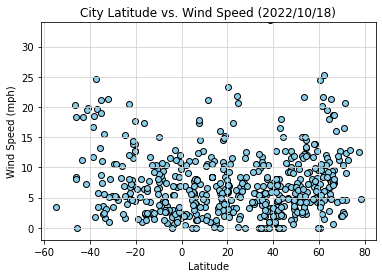

In [10]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df ["Lat"],city_data_df ["Wind Speed"],edgecolors="black",facecolors="skyblue")
plt.title("City Latitude vs. Wind Speed (2022/10/18)")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.ylim(-2,34)
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [11]:
# Define a function to create Linear Regression plots
weather_data_north = city_data_df [city_data_df ['Lat'] >= 0]

weather_data_south = city_data_df [city_data_df ['Lat'] < 0]

NameError: name 'weather_dataframe' is not defined

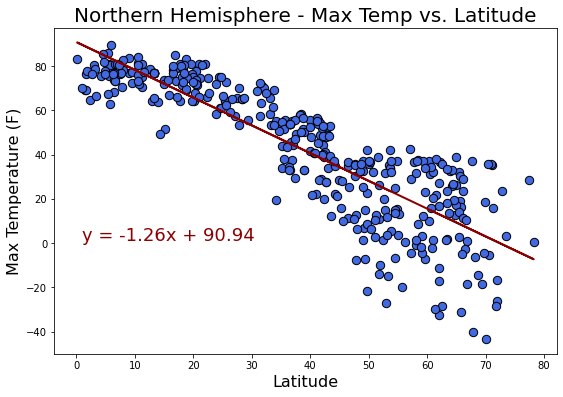

In [12]:
# Build scatter plot for each data type:
plt.figure(figsize=(9,6))
x_values = weather_data_north['Lat']
y_values = weather_data_north['Max Temp']

# Perform a linear regression for temperature vs. latitude:
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values:
regress_values = x_values * slope + intercept

# Create line equation string:
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

# Create plot:
plt.scatter(x_values,y_values, marker='o', color='royalblue', s=[70], edgecolors='black')
plt.plot(x_values,regress_values, 'darkred', linewidth=2)

# Incorporate the other graph properties:
plt.title('Northern Hemisphere - Max Temp vs. Latitude', fontsize=20)
plt.ylabel('Max Temperature (F)', fontsize=16, color='black')
plt.xlabel('Latitude', fontsize=16, color='black')
plt.annotate(line_eq,(1, 1), fontsize=18, color='darkred')
#plt.grid(False)

# Set the limits of the y axis:
plt.ylim(min(weather_dataframe['Max Temp'])-10, max(weather_dataframe['Max Temp'])+10)

# Set the limits of the x axis:
plt.xlim(-3, max(weather_dataframe['Lat'])+3)

# Save the figure:
plt.savefig('../output_data/City Latitude vs. MaxTemp_North.png')

# Show plot:
plt.show()


   

NameError: name 'weather_dataframe' is not defined

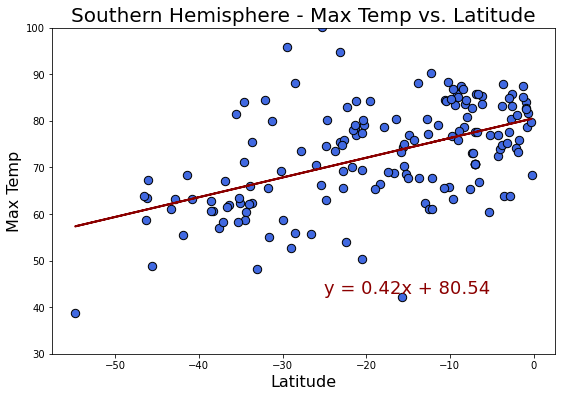

In [13]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# Build scatter plot for each data type:
plt.figure(figsize=(9,6))
x_values = weather_data_south['Lat']
y_values = weather_data_south['Max Temp']

# Perform a linear regression for temperature vs. latitude:
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values:
regress_values = x_values * slope + intercept

# Create line equation string:
line_eq2 = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

# Create plot:
plt.scatter(x_values,y_values, marker='o', color='royalblue', s=[70], edgecolors='black')
plt.plot(x_values,regress_values, 'darkred', linewidth=2)

# Incorporate the other graph properties:
plt.title('Southern Hemisphere - Max Temp vs. Latitude', fontsize=20)
plt.ylabel('Max Temp', fontsize=16, color='black')
plt.xlabel('Latitude', fontsize=16, color='black')
plt.annotate(line_eq2,(-25,43),fontsize=18, color='darkred')
#plt.grid(False)

# Set the limits of the y axis:
plt.ylim(30, 100)

# Set the limits of the x axis:
plt.xlim(min(weather_dataframe['Lat'])-3, +1)

# Save the figure:
plt.savefig('../output_data/City Latitude vs. MaxTemp_South.png')

# Show plot:
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

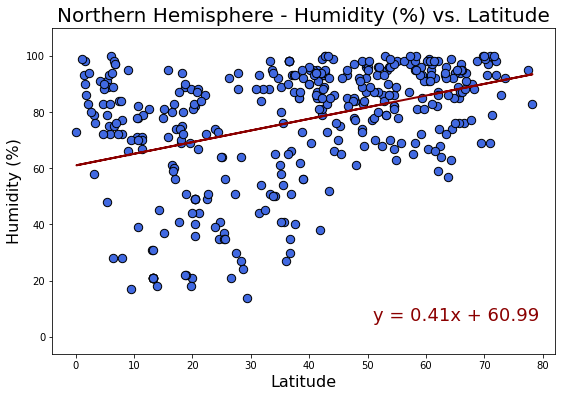

In [14]:
# Northern Hemisphere
# Build scatter plot for each data type:
plt.figure(figsize=(9,6))
x_values = weather_data_north['Lat']
y_values = weather_data_north['Humidity']

# Perform a linear regression for humidity vs. latitude:
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values:
regress_values = x_values * slope + intercept

# Create line equation string:
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

# Create plot:
plt.scatter(x_values,y_values, marker='o', color='royalblue', s=[70], edgecolors='black')
plt.plot(x_values,regress_values,'darkred', linewidth=2)

# Incorporate the other graph properties:
plt.title('Northern Hemisphere - Humidity (%) vs. Latitude', fontsize=20)
plt.ylabel('Humidity (%)', fontsize=16, color='black')
plt.xlabel('Latitude', fontsize=16, color='black')
plt.annotate(line_eq,(51,6),fontsize=18, color='darkred')
#plt.grid(False)

# Set the limits of the y axis:
plt.ylim(-6, 110)

# Set the limits of the x axis:
plt.xlim(-4, 82)

# Save the figure:
plt.savefig('../output_data/City Latitude vs. Humidity_North.png')

# Show plot:
plt.show()


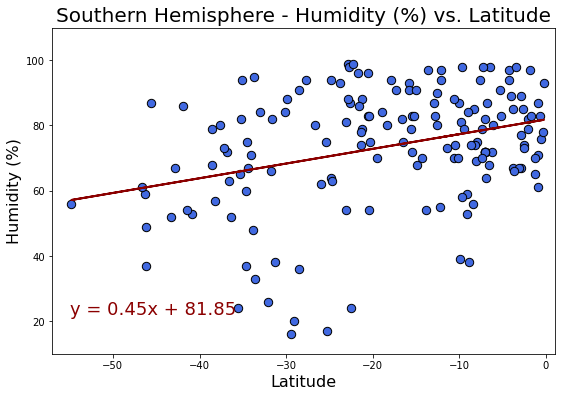

In [15]:
# Southern Hemisphere
# Build scatter plot for each data type:
plt.figure(figsize=(9,6))
x_values = weather_data_south['Lat']
y_values = weather_data_south['Humidity']

# Perform a linear regression for humidity vs. latitude:
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values:
regress_values = x_values * slope + intercept

# Create line equation string:
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

# Create plot:
plt.scatter(x_values,y_values, marker='o', color='royalblue', s=[70], edgecolors='black')
plt.plot(x_values,regress_values,'darkred', linewidth=2)

# Incorporate the other graph properties:
plt.title('Southern Hemisphere - Humidity (%) vs. Latitude', fontsize=20)
plt.ylabel('Humidity (%)', fontsize=16, color='black')
plt.xlabel('Latitude', fontsize=16, color='black')
plt.annotate(line_eq,(-55,22), fontsize=18, color='darkred')
#plt.grid(False)

# Set the limits of the y axis:
plt.ylim(10, 110)

# Set the limits of the x axis:
plt.xlim(-57, 1)

# Save the figure:
plt.savefig('../output_data/City Latitude vs. Humidity_South.png')

# Show plot:
plt.show()


**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

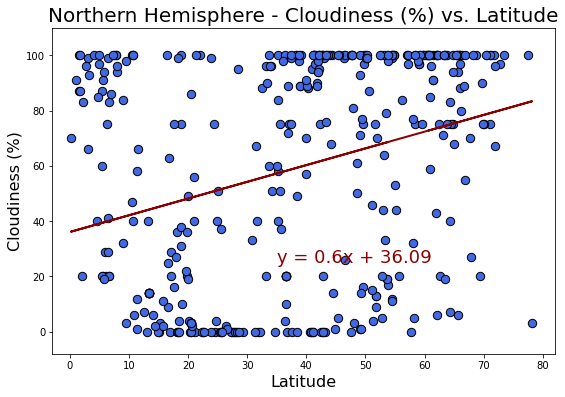

In [16]:
# Northern Hemisphere
# Build scatter plot for each data type:
plt.figure(figsize=(9,6))
x_values = weather_data_north['Lat']
y_values = weather_data_north['Cloudiness']

# Perform a linear regression for cloudiness vs. latitude:
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values:
regress_values = x_values * slope + intercept

# Create line equation string:
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

# Create plot:
plt.scatter(x_values,y_values, marker='o', color='royalblue', s=[70], edgecolors='black')
plt.plot(x_values,regress_values,'darkred', linewidth=2)

# Incorporate the other graph properties:
plt.title('Northern Hemisphere - Cloudiness (%) vs. Latitude', fontsize=20)
plt.ylabel('Cloudiness (%)', fontsize=16, color='black')
plt.xlabel('Latitude', fontsize=16, color='black')
plt.annotate(line_eq,(35,25), fontsize=18, color='darkred')
#plt.grid(False)

# Set the limits of the y axis:
plt.ylim(-8, 110)

# Set the limits of the x axis:
plt.xlim(-3, 82)

# Save the figure:
plt.savefig('../output_data/City Latitude vs. Cloudiness_North.png')

# Show plot:
plt.show()


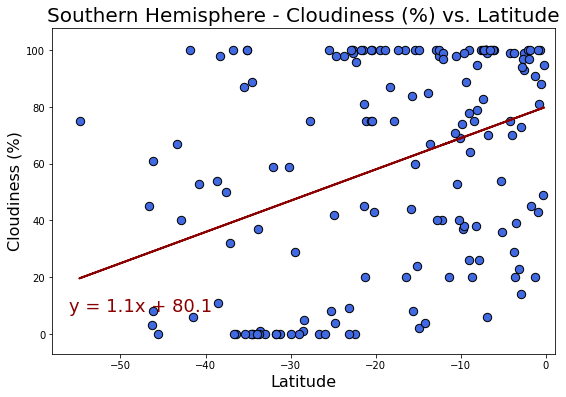

In [17]:
# Southern Hemisphere
# build scatter plot for each data type:
plt.figure(figsize=(9,6))
x_values = weather_data_south['Lat']
y_values = weather_data_south['Cloudiness']

# Perform a linear regression for cloudiness vs. latitude:
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values:
regress_values = x_values * slope + intercept

# Create line equation string:
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

# Create plot:
plt.scatter(x_values,y_values, marker='o', color='royalblue', s=[70], edgecolors='black')
plt.plot(x_values,regress_values,'darkred', linewidth=2)

# Incorporate the other graph properties:
plt.title('Southern Hemisphere - Cloudiness (%) vs. Latitude', fontsize=20)
plt.ylabel('Cloudiness (%)', fontsize=16, color='black')
plt.xlabel('Latitude', fontsize=16, color='black')
plt.annotate(line_eq,(-56,8), fontsize=18, color='darkred')
#plt.grid(False)

# Set the limits of the y axis:
plt.ylim(-7, 108)

# Set the limits of the x axis:
plt.xlim(-58, 1)

# Save the figure:
plt.savefig('../output_data/City Latitude vs. Cloudiness_South.png')

# Show plot:
plt.show()


**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

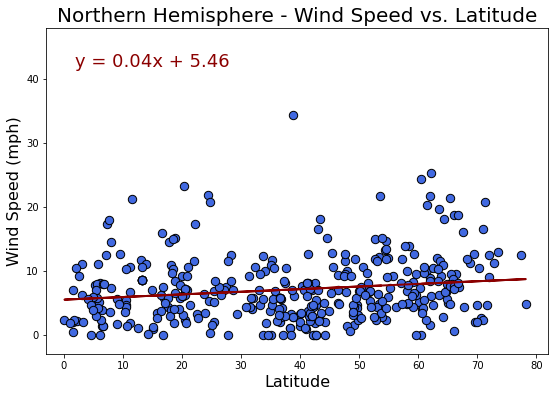

In [18]:
# Northern Hemisphere
# Build scatter plot for each data type:
plt.figure(figsize=(9,6))
x_values = weather_data_north['Lat']
y_values = weather_data_north['Wind Speed']

# Perform a linear regression for wind speed vs. latitude:
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values:
regress_values = x_values * slope + intercept

# Create line equation string:
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

# Create plot:
plt.scatter(x_values,y_values, marker='o', color='royalblue', s=[70], edgecolors='black')
plt.plot(x_values,regress_values,'darkred', linewidth=2)

# Incorporate the other graph properties:
plt.title('Northern Hemisphere - Wind Speed vs. Latitude', fontsize=20)
plt.ylabel('Wind Speed (mph)', fontsize=16, color='black')
plt.xlabel('Latitude', fontsize=16, color='black')
plt.annotate(line_eq,(2,42), fontsize=18, color='darkred')
#plt.grid(False)

# Set the limits of the y axis:
plt.ylim(-3, 48)

# Set the limits of the x axis:
plt.xlim(-3, 82)


# Save the figure:
plt.savefig('../output_data/City Latitude vs. Wind_North.png')

# Show plot:
plt.show()


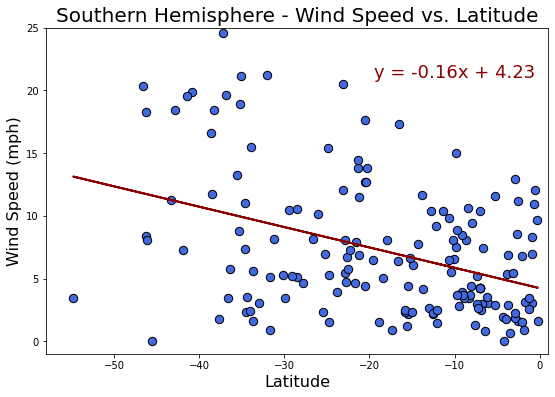

In [19]:
# Southern Hemisphere
# Build scatter plot for each data type:
plt.figure(figsize=(9,6))
x_values = weather_data_south['Lat']
y_values = weather_data_south['Wind Speed']

# Perform a linear regression on wind speed vs. latitude:
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values:
regress_values = x_values * slope + intercept

# Create line equation string:
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

# Create plot:
plt.scatter(x_values,y_values, marker='o', color='royalblue', s=[70], edgecolors='black')
plt.plot(x_values,regress_values,'darkred', linewidth=2)

# Incorporate the other graph properties:
plt.title('Southern Hemisphere - Wind Speed vs. Latitude', fontsize=20)
plt.ylabel('Wind Speed (mph)', fontsize=16, color='black')
plt.xlabel('Latitude', fontsize=16, color='black')
plt.annotate(line_eq,(-19.5,21), fontsize=18, color='darkred')
#plt.grid(False)

# Set the limits of the y axis:
plt.ylim(-1, 25)

# Set the limits of the x axis:
plt.xlim(-58, 1)

# Save the figure:
plt.savefig('../output_data/City Latitude vs. Wind_South.png')

# Show plot:
plt.show()


**Discussion about the linear relationship:** YOUR RESPONSE HERE